<a href="https://colab.research.google.com/github/tayfununal/Uniform-Autoencoder-with-Latent-Flow-Matching/blob/main/datasets/visualization/celebA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!git clone https://github.com/tayfununal/Uniform-Autoencoder-with-Latent-Flow-Matching.git

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
from torchvision.utils import make_grid

import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

import os

%run /content/Uniform-Autoencoder-with-Latent-Flow-Matching/datasets/celebA.ipynb

plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [ ]:
import zipfile
import os

def unzip_to_data(zip_path, out_dir='./data'):
    os.makedirs(out_dir, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(out_dir)
    print(f"Zip extracted: {out_dir}")

unzip_to_data('/content/drive/MyDrive/CelebA/list_attr_celeba.csv.zip')
unzip_to_data('/content/drive/MyDrive/CelebA/img_align_celeba.zip')
unzip_to_data('/content/drive/MyDrive/CelebA/list_eval_partition.csv.zip')

In [33]:
# --- Dataset ---
root_dir = './data/img_align_celeba'

test_dataset  = CelebADataset(img_dir=root_dir, attr_path='./data/list_attr_celeba.csv', partition_path='./data/list_eval_partition.csv', mode='test')

# --- DataLoader ---
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

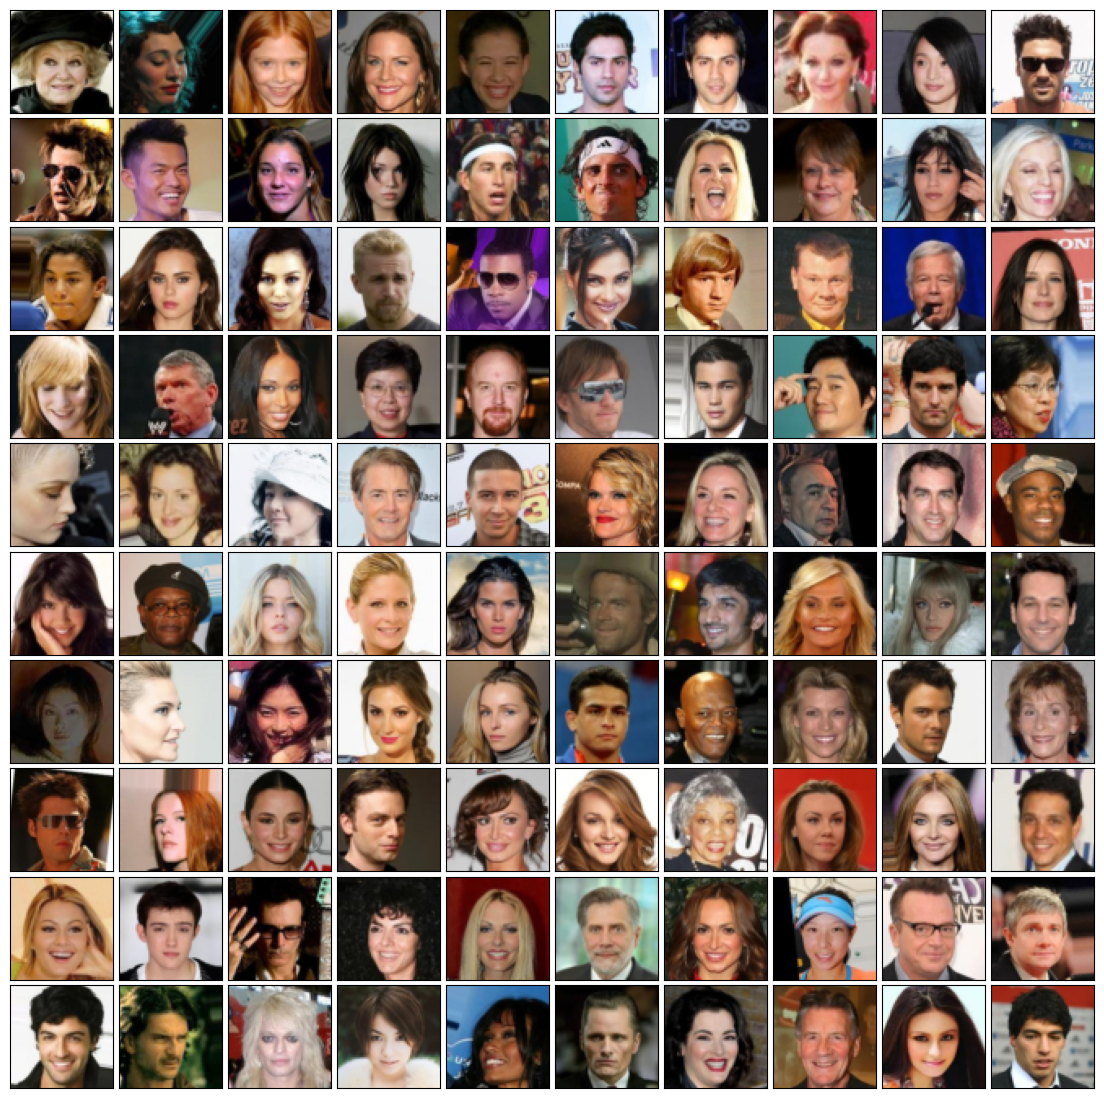

In [38]:
X_test = next(iter(test_loader))[:100]

fig, axs = plt.subplots(10, 10, figsize=(14, 14), sharex=True, sharey=True,
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.05, wspace=0.05))

for i in range(10):
    for j in range(10):
        idx = i * 10 + j
        axs[i, j].imshow(X_test[idx].reshape(3, 64, 64).permute(1, 2, 0).detach().numpy())

plt.savefig('./celebA.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()